In [1]:
import numpy as np
import matplotlib.pyplot as plt

# il neurone NOT
Il neurone NOT, recplica la porta logica NOT.

<img src="../../unit0-intro/images/NOT_neuron.png" alt="AND Neuron" width="300"/>

<table style="border-collapse: collapse;">
  <tr>
    <th style="color:pink; text-align: center; border: 1px solid white;">x<sub>1</sub></th>
    <th style="color:lightblue; text-align: center; border: 1px solid white;">y</th>
  </tr>
  <tr>
    <td style="color:white; text-align: center; border: 1px solid white;">0</td>
    <td style="color:lightgreen; text-align: center; border: 1px solid white;">1</td>
  </tr>
  <tr>
    <td style="color:white; text-align: center; border: 1px solid white;">1</td>
    <td style="color:#D1B2FF; text-align: center; border: 1px solid white;">0</td>
  </tr>
</table>

È un neurone con un input singolo, ovvero un solo numero o 0 o 1, che restituisce un singolo valore opposto 1 o 0.


In [2]:


# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# OR neuron model with training
class Neuron:
    def __init__(self):
        # Set random seed for reproducibility
        np.random.seed(42)
        # Initialize weights and bias randomly
        self.weights = np.random.randn()
        self.bias = np.random.randn()
        self.errors = []
    
    def predict(self, x):
        z = self.weights * x  + self.bias
        # Apply sigmoid function
        y_prob = sigmoid(z)
        # Apply threshold to get binary output
        y_pred = 1 if y_prob > 0.5 else 0
        return y_pred
    
    def train(self, inputs, labels, learning_rate=0.1, epochs=10000):
        for _ in range(epochs):
            total_error = 0
            for x, y_true in zip(inputs, labels):
                
                z = self.weights * x + self.bias
                y_pred = sigmoid(z)
                # y_pred = 1 if sigmoid(z) > 0.5 else 0
            
                # Calculate gradients
                error = y_pred - y_true
                d_weights = error * sigmoid_derivative(z) * np.array([x])
                d_bias = error * sigmoid_derivative(z)
                total_error += error**2
                
                # Update weights and bias
                self.weights -= learning_rate * d_weights
                self.bias -= learning_rate * d_bias

            # strore the total error for each epoch
            self.errors.append(total_error)
                
    def plot_errors(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors, label='Total Squared Error', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Total Squared Error')
        plt.title('Error Reduction Over Time During Training')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_decision_boundary(self):
        # Generate a range of input values
        x_min, x_max = -0.5, 1.5
        x_values = np.linspace(x_min, x_max, 100)
        
        # Predict outputs for each input value
        y_values = np.array([self.predict(x) for x in x_values])
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(8, 6))
        fig.patch.set_facecolor('black')  # Set figure background to black
        ax.set_facecolor('black')  # Set axes background to black
        
        # Plot the decision boundary
        ax.plot(x_values, y_values, color='lightgreen', label='Decision Boundary')
        
        # Plot the original data points
        ax.scatter([0, 1], [1, 0], color=['lightgreen', 'purple'], edgecolor='white', s=200, label='Data Points')
        
        # Set plot labels and limits
        ax.set_xlabel('Input $x$', fontsize=14, color='pink')
        ax.set_ylabel('Output $y$', fontsize=14, color='pink')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(-0.1, 1.1)
        
        # Set axis and grid colors
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        
        # Set the title and show the plot
        ax.set_title('Decision Boundary for NOT Neuron', color='white')
        ax.legend()
        plt.show()


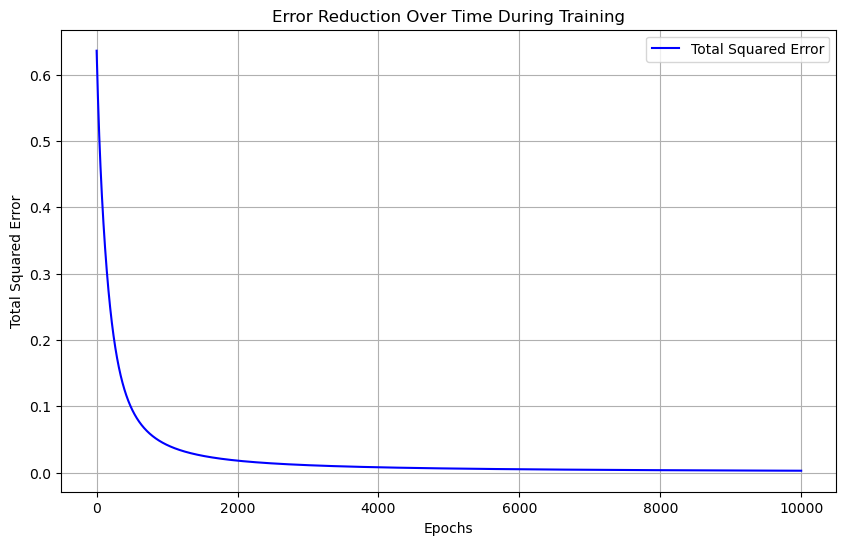

TypeError: Neuron.plot_decision_boundary() takes 1 positional argument but 3 were given

In [3]:
# Training data for OR gate
inputs = np.array([0, 1])
labels = np.array([1, 0])

# Initialize the neuron
NOTneuron = Neuron()

# Train the neuron
NOTneuron.train(inputs, labels)

NOTneuron.plot_errors()

NOTneuron.plot_decision_boundary(inputs, labels)

# Test the trained neuron
print("x | y_pred")
for x in inputs:
    y_pred = NOTneuron.predict(x)
    
    print(f"{x}  | {y_pred:.1f}")

In [ ]:
NOTneuron.plot_decision_boundary()

ValueError: object __array__ method not producing an array

<Figure size 800x600 with 1 Axes>

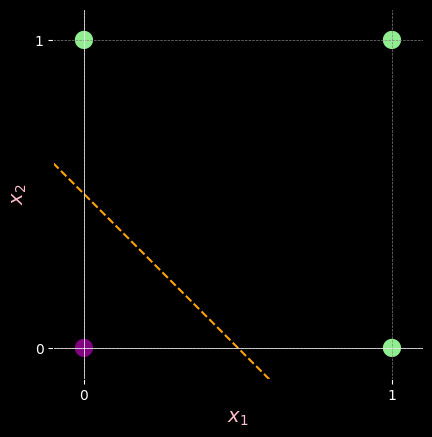

In [22]:
# Points and their classifications
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Corresponding OR gate outputs

# Colors for the points
colors = ['purple' if label == 0 else 'lightgreen' for label in labels]

# Create the plot with a black background
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plotting the points
ax.scatter(points[:, 0], points[:, 1], color=colors, s=200, edgecolors='black')

# Draw the decision boundary
x_values = np.linspace(-0.1, 1.1, 100)
y_values = -x_values + 0.5  # This is the decision boundary line
ax.plot(x_values, y_values, 'orange', linestyle='--')

# Annotating the axes
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(0, color='white', linewidth=0.5)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Set equal aspect ratio for x and y axes
ax.set_aspect('equal')

# Labels and title
ax.set_xlabel('$x_1$', fontsize=14, color='pink')
ax.set_ylabel('$x_2$', fontsize=14, color='pink')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.tick_params(colors='white')

# Display the plot
ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.show()

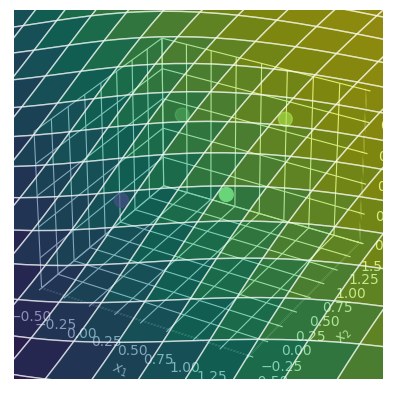

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate grid data for the surface
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
z = sigmoid(x1 + x2)

# OR gate data points
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Corresponding OR gate outputs
z_points = sigmoid(points[:, 0] + points[:, 1])

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='black')

# Plot the surface
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.6, edgecolor='white')

# Plot the OR gate data points
colors = ['purple' if label == 0 else 'lightgreen' for label in labels]
ax.scatter(points[:, 0], points[:, 1], z_points, color=colors, s=100)

# Set the axis labels
ax.set_xlabel('$x_1$', color='white')
ax.set_ylabel('$x_2$', color='white')
ax.set_zlabel('Output', color='white')

# Set axis limits
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(0, 1)

# Set background color
ax.set_facecolor('black')
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# Set grid color
ax.xaxis._axinfo["grid"].update({"color": "white"})
ax.yaxis._axinfo["grid"].update({"color": "white"})
ax.zaxis._axinfo["grid"].update({"color": "white"})

# Set tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Show the plot
plt.show()

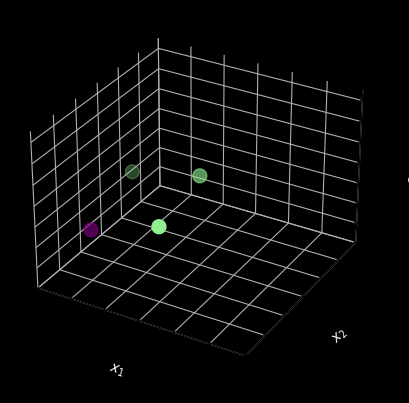

In [58]:

# Generate grid data for the surface
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
z = sigmoid(x1 + x2)

# OR gate data points
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Corresponding OR gate outputs
z_points = sigmoid(points[:, 0] + points[:, 1])

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the background to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot the surface with a wireframe and remove color map
# ax.plot_wireframe(x1, x2,  color='white', alpha=0.5)

# Plot the OR gate data points
colors = ['purple' if label == 0 else 'lightgreen' for label in labels]
ax.scatter(points[:, 0], points[:, 1], z_points, color=colors, s=100)

# Set the axis labels with white color
ax.set_xlabel('$x_1$', color='white')
ax.set_ylabel('$x_2$', color='white')
ax.set_zlabel('Output', color='white')

# Set axis limits to match the input space
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.set_zlim(0, 1.5)

# Adjust the pane colors to match the black background
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# # Adjust grid line colors
# ax.xaxis._axinfo["grid"].update({"color": "gray"})
# ax.yaxis._axinfo["grid"].update({"color": "gray"})
# ax.zaxis._axinfo["grid"].update({"color": "gray"})

# # Set tick colors to white
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Display the plot
plt.show()